# Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

# Reading and understanding Data

In [2]:
# Read bike sharing dataset
bikes_df=pd.read_csv('day.csv')
bikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Check shape of dataset
bikes_df.shape

(730, 16)

In [4]:
# Check the info 
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Check the statistics of dataset
bikes_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# EDA

# Data Cleaning

In [6]:
# Drop Unnecessary columns
bikes_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

 <b>Instant Column:</b> It is just the number of each instance of the record wich is not useful for analysis.<br> <b>dteday Column:</b> This column information is already represented by yr mnth,weekday columns<br><b>Casual & Registered Columns:</b> These two columns are represented by cnt (cnt = casual + registered)

In [7]:
# Data Transformations on categorical columns
bikes_df['weathersit']=bikes_df[['weathersit']].apply(lambda x: x.map({1:'Clear',2:'Mist',3:'Light Rain',4:'Heavy Rain'}))
bikes_df['season']=bikes_df[['season']].apply(lambda x:x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))
bikes_df['weekday']=bikes_df[['weekday']].apply(lambda x:x.map({0:'sunday', 1:'monday', 2:'tuesday', 3:'wednesday',4:'thrusday',5:'friday',6:'saturday'}))
bikes_df['mnth']=bikes_df[['mnth']].apply(lambda x:x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov','12':'Dec'}))

In [8]:
# Display head after transforms
bikes_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Data Visualization

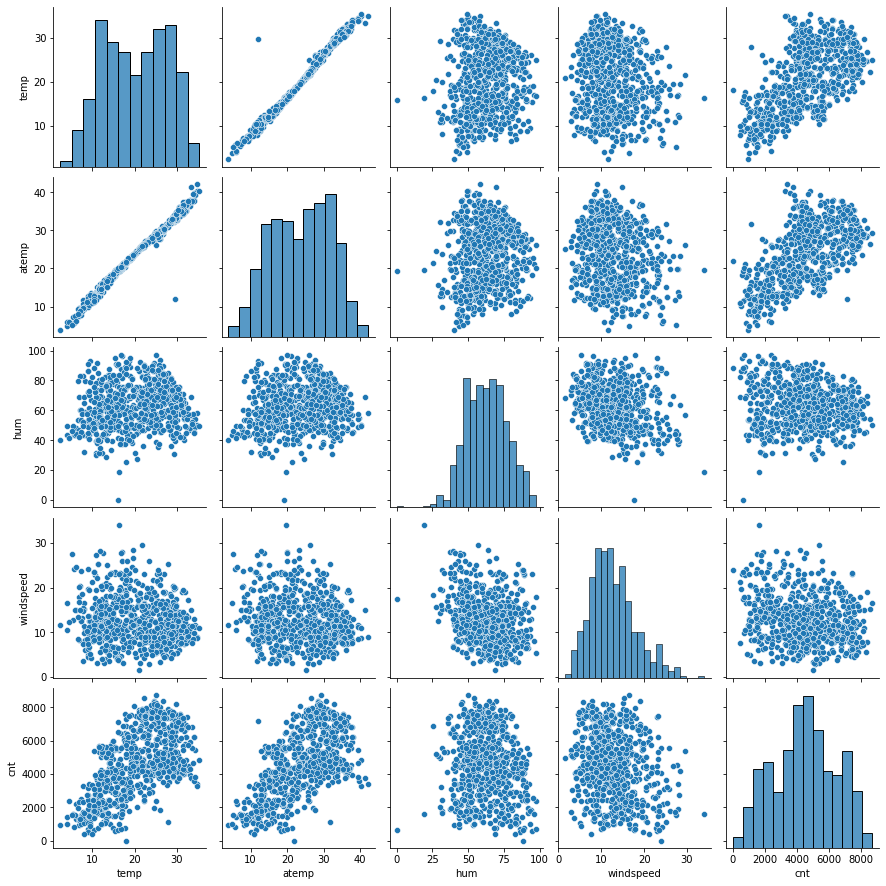

In [21]:
# Plot Pairplot 
sns.pairplot(bikes_df[['temp','atemp','hum','windspeed','cnt']])
plt.show()

<b>Observation:</b><br>
temp and atemp has strong positive correlation with count of rentals(cnt). 

<AxesSubplot:xlabel='season', ylabel='cnt'>

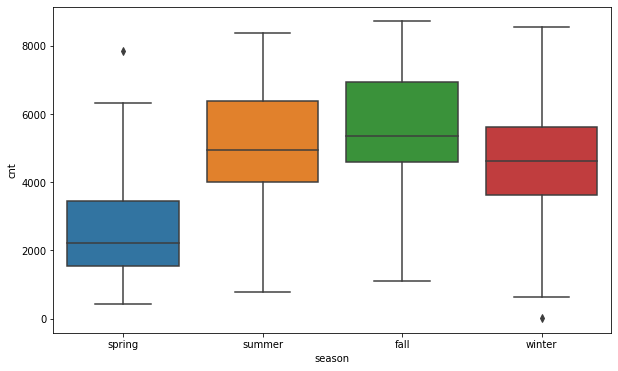

In [10]:
# Boxplot on season column
plt.figure(figsize=((10,6)))
sns.boxplot(bikes_df['season'],bikes_df['cnt'])

<b>Observation:</b><br>
Highest number of rentals booked in Fall Season and least number of rentals booked in spring season.

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

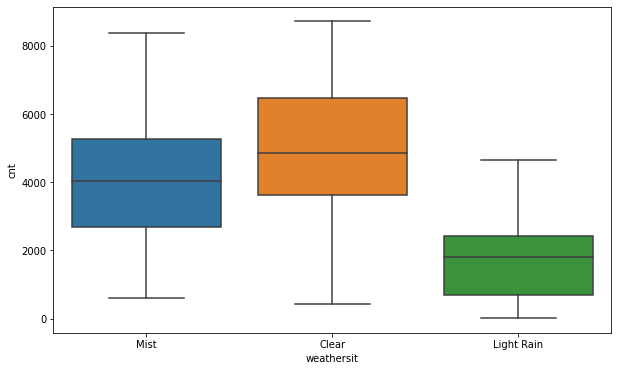

In [11]:
# Boxplot on weather column
plt.figure(figsize=((10,6)))
sns.boxplot(bikes_df['weathersit'],bikes_df['cnt'])

<b>Observation:</b><br>
Highest number of rentals booked when the weather is clear and least number of rentals booked when its raining.

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

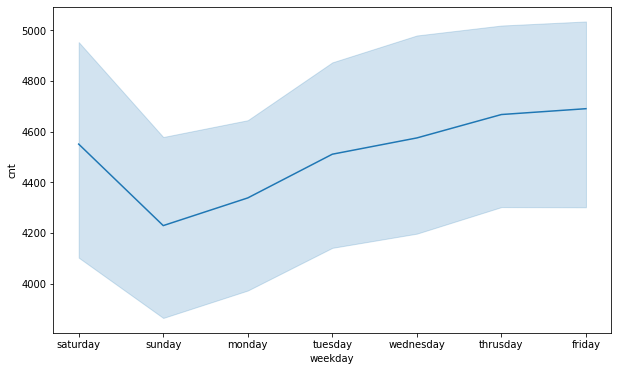

In [20]:
# Line plot cnt vs weekday
plt.figure(figsize=((10,6)))
sns.lineplot(bikes_df['weekday'],bikes_df['cnt'])

<b>Observation:</b><br>
most of the people book rentals on thursdays & fridays

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

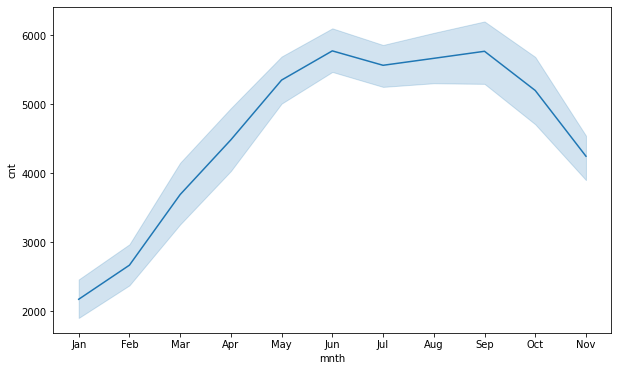

In [13]:
# Line plot cnt vs weekday
plt.figure(figsize=((10,6)))
sns.lineplot(bikes_df['mnth'],bikes_df['cnt'])

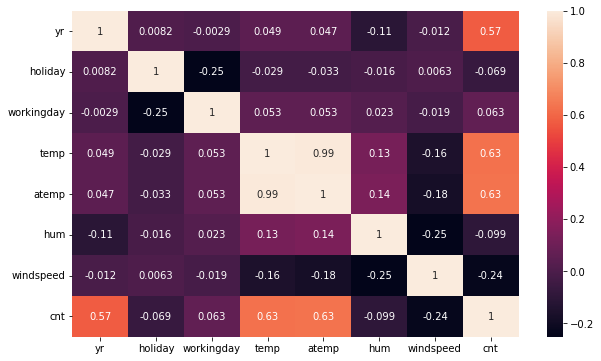

In [52]:
# Heatmap of correlation matrix
plt.figure(figsize=((10,6)))
sns.heatmap(bikes_df.corr(),annot=True)
plt.show()

<b>Observation:</b><br>
Temp & atemp are correlated along with cnt

# Dummy encoding

In [53]:
# Create dummy variables on categorical columns
dummies_df=pd.get_dummies(bikes_df[['mnth','weekday','season','weathersit']],drop_first=True)
bikes_df.drop(['mnth','weekday','season','weathersit'],axis=1,inplace=True)
df=pd.concat([bikes_df,dummies_df],axis = 1)

In [54]:
# Dispaly head after dummy encoding
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_Aug,mnth_Feb,...,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,season_spring,season_summer,season_winter,weathersit_Light Rain,weathersit_Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,1,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,1,0,0,0,0


In [55]:
# Set seed to replicate same results every time
np.random.seed(42)

# Data Preparation

In [56]:
# Split train & test sets
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 42)

In [57]:
# Check shape of train set
df_train.shape

(584, 29)

In [58]:
# Check shape of test set
df_test.shape

(146, 29)

In [59]:
# Rescalling Features
scaler=MinMaxScaler()
# Apply scaler() to all the columns except the 'binary variables' and 'dummy' variables
num_vars=['temp','atemp','hum','windspeed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [60]:
# Display head after scalling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_Aug,mnth_Feb,...,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,season_spring,season_summer,season_winter,weathersit_Light Rain,weathersit_Mist
247,0,1,0,0.765327,0.717455,0.814513,0.475900,3351,0,0,...,0,0,0,0,0,0,0,0,0,1
335,0,0,1,0.317788,0.331261,0.644911,0.195963,3940,0,0,...,0,0,0,0,0,0,0,1,0,0
702,1,0,1,0.519232,0.511907,0.756118,0.379454,6606,0,0,...,0,0,0,1,0,0,0,1,0,0
440,1,0,0,0.566998,0.559152,0.778874,0.220845,7836,0,0,...,1,0,0,0,0,1,0,0,0,1
136,0,0,1,0.626185,0.603102,0.863461,0.637592,4123,0,0,...,0,0,0,1,0,0,1,0,0,1


In [61]:
# Check statistics
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_Aug,mnth_Feb,...,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,season_spring,season_summer,season_winter,weathersit_Light Rain,weathersit_Mist
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.511986,0.032534,0.672945,0.551484,0.527193,0.654151,0.410017,4546.361301,0.077055,0.073630,...,0.143836,0.150685,0.147260,0.138699,0.138699,0.229452,0.250000,0.255137,0.032534,0.344178
std,0.500285,0.177566,0.469540,0.227249,0.212483,0.146644,0.187249,1955.054331,0.266907,0.261392,...,0.351224,0.358048,0.354669,0.345928,0.345928,0.420841,0.433384,0.436312,0.177566,0.475507
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354266,0.353829,0.542745,0.276424,3247.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.566998,0.558730,0.657578,0.379465,4572.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745598,0.698392,0.757346,0.520978,6035.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


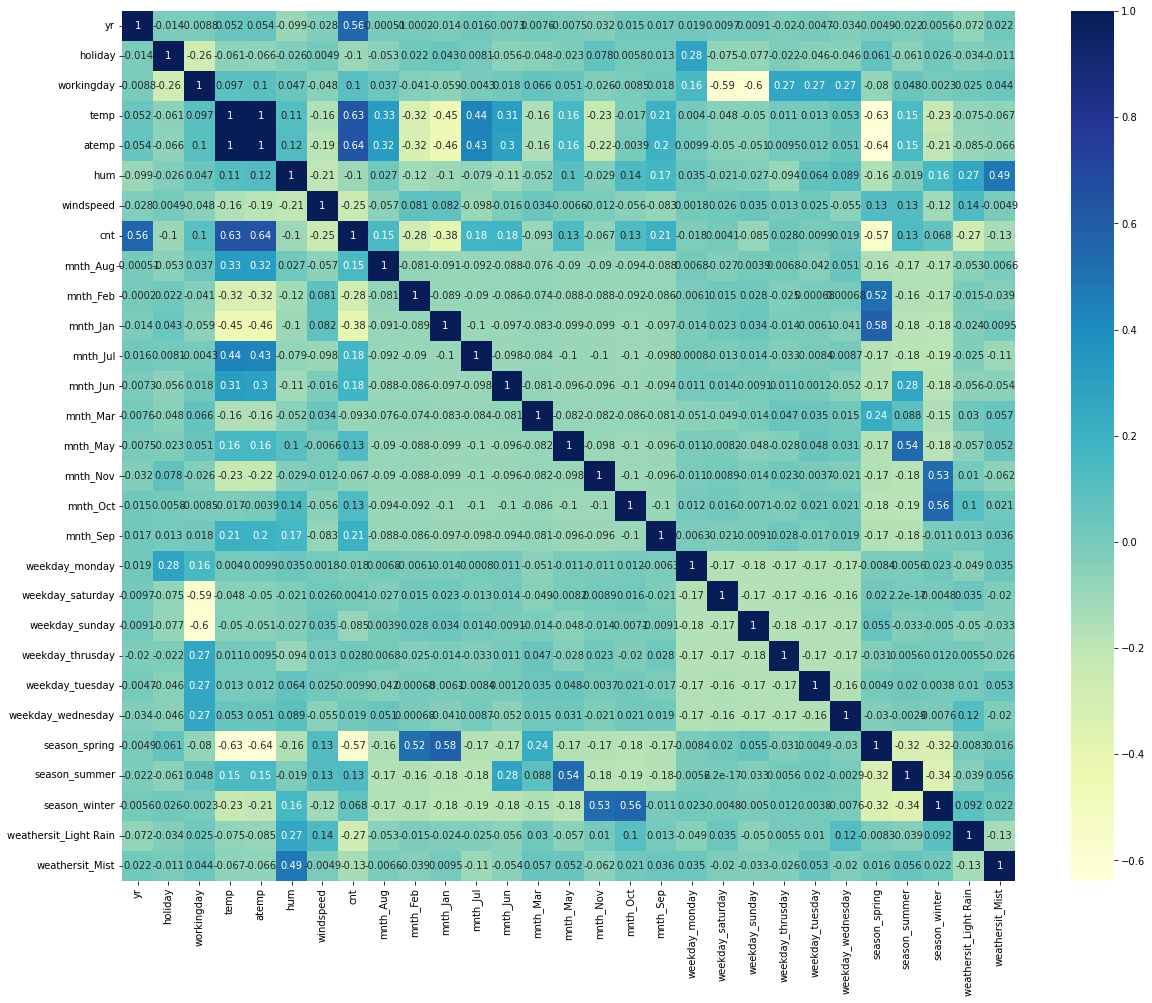

In [62]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 16))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

<b>Observation:</b><br>
From above heatmap it is clear that Temp & atemp, mnth_Oct & mnth_Nov, mnth_Jan & mnth_feb are correlated.

# Dividing into X and Y sets for the model building

In [63]:
# Split training set into independant & dependant datasets
y_train = df_train.pop('cnt')
X_train = df_train

# Feature Selection Using RFE

In [64]:
# Select arbitary number of features for RFE
num_of_Selected_features=20

In [65]:
# Fit Linear Regression
lm = LinearRegression()
lm.fit(X_train, y_train)
# Fit RFE on lm model
rfe = RFE(estimator=lm, n_features_to_select=num_of_Selected_features)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [66]:
# Dispaly the important features selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_Aug', False, 6),
 ('mnth_Feb', False, 3),
 ('mnth_Jan', False, 4),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 7),
 ('mnth_Mar', True, 1),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', True, 1),
 ('mnth_Sep', True, 1),
 ('weekday_monday', False, 2),
 ('weekday_saturday', True, 1),
 ('weekday_sunday', True, 1),
 ('weekday_thrusday', False, 8),
 ('weekday_tuesday', False, 5),
 ('weekday_wednesday', False, 9),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weathersit_Light Rain', True, 1),
 ('weathersit_Mist', True, 1)]

In [67]:
# Features selected by RFE
rfe_columns = X_train.columns[rfe.support_]
rfe_columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'mnth_Jul', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_saturday', 'weekday_sunday', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_Light Rain', 'weathersit_Mist'],
      dtype='object')

In [68]:
# Prepare new training set based on rfe features 
X_train_rfe = X_train[rfe_columns]

In [69]:
# Dispaly head
X_train_rfe.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,mnth_Jul,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_saturday,weekday_sunday,season_spring,season_summer,season_winter,weathersit_Light Rain,weathersit_Mist
247,0,1,0,0.765327,0.717455,0.814513,0.475900,0,0,0,0,0,1,0,0,0,0,0,0,1
335,0,0,1,0.317788,0.331261,0.644911,0.195963,0,0,0,0,0,0,0,0,0,0,1,0,0
702,1,0,1,0.519232,0.511907,0.756118,0.379454,0,0,0,0,0,0,0,0,0,0,1,0,0
440,1,0,0,0.566998,0.559152,0.778874,0.220845,0,1,0,0,0,0,1,0,1,0,0,0,1
136,0,0,1,0.626185,0.603102,0.863461,0.637592,0,0,1,0,0,0,0,0,0,1,0,0,1


# Model-1

In [70]:
# Adding constant to trainset
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     157.5
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          4.78e-211
Time:                        11:25:17   Log-Likelihood:                -4716.2
No. Observations:                 584   AIC:                             9472.
Df Residuals:                     564   BIC:                             9560.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2229.66

In [71]:
# Check VIF vaules for trainset
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,187.31
4,atemp,183.33
2,workingday,62.33
14,weekday_sunday,14.82
13,weekday_saturday,13.78
17,season_winter,5.57
15,season_spring,5.56
1,holiday,4.00
16,season_summer,3.50
11,mnth_Oct,2.36


<b>Observation:</b><br> 'atemp','workingday','weekday_saturday','weekday_sunday' have high VIF values and 'holiday','mnth_Nov' has high P-values . so we remove them in next model training

# Model-2

In [72]:
# Drop variables with high VIF & P-values
X_train_rfe.drop(['atemp','workingday','weekday_saturday','weekday_sunday','holiday','mnth_Nov'],axis=1,inplace=True)

In [73]:
# Adding constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a second fitted model
lr2 = sm.OLS(y_train, X_train_lm).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     202.4
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          2.70e-210
Time:                        11:25:17   Log-Likelihood:                -4731.5
No. Observations:                 584   AIC:                             9493.
Df Residuals:                     569   BIC:                             9559.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2951.21

In [74]:
# Check VIF vaules 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,27.65
1,temp,16.72
3,windspeed,5.55
9,season_spring,4.02
11,season_winter,3.94
10,season_summer,3.52
13,weathersit_Mist,2.27
0,yr,2.07
4,mnth_Jul,1.81
7,mnth_Oct,1.70


<b>Observation:</b><br> Humidity has high VIF value. 'mnth_May','season_summer','mnth_Jul' have high p-values. so we remove them in next model training. Even though temp has high VIF value we will not remove them as it is a very important variable for business.

# Model-3

In [75]:
# Drop variables with High vif and p-values
X_train_rfe.drop(['hum','mnth_May','season_summer','mnth_Jul'],axis=1,inplace=True)
# Adding constant
X_train_lm = sm.add_constant(X_train_rfe)
#fit model
lr3 = sm.OLS(y_train, X_train_lm).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     260.8
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          7.24e-206
Time:                        11:25:17   Log-Likelihood:                -4753.3
No. Observations:                 584   AIC:                             9529.
Df Residuals:                     573   BIC:                             9577.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2529.37

In [76]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.69
1,temp,4.27
0,yr,2.05
7,season_winter,1.98
6,season_spring,1.70
4,mnth_Oct,1.66
9,weathersit_Mist,1.53
5,mnth_Sep,1.18
3,mnth_Mar,1.15
8,weathersit_Light Rain,1.11


<b>Observation:</b><br> All VIF values are below 5 but season_winter has high p-value so we remove it.

# Model-4 (Final Model)

In [78]:
# Drop Season_winter
X_train_rfe.drop(['season_winter'],axis=1,inplace=True)
# Add contant
X_train_lm = sm.add_constant(X_train_rfe)
# Fit model
lr4 = sm.OLS(y_train, X_train_lm).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     289.6
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          7.13e-207
Time:                        11:25:17   Log-Likelihood:                -4753.9
No. Observations:                 584   AIC:                             9528.
Df Residuals:                     574   BIC:                             9571.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2678.19

In [79]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif



,Features,VIF
2,windspeed,4.44
1,temp,4.22
0,yr,2.01
6,season_spring,1.62
8,weathersit_Mist,1.51
5,mnth_Sep,1.17
4,mnth_Oct,1.15
3,mnth_Mar,1.14
7,weathersit_Light Rain,1.10


<b>Obeservations:</b><br> VIF Values are under 5 which rules out Multicollinearity. All p-values are zero which means there are no insignificant variables. F-statistic is comparetively high which makes the overall Fit of the model is statistically Significant. The R-squared and adjusted R-squared are almost similar with good value(0.82) which means model can perform better on unseen data as well.

# Residual Analysis

In [80]:
# Predict the train data
y_train_pred = lr4.predict(X_train_lm)

Text(0.5, 0, 'Errors')

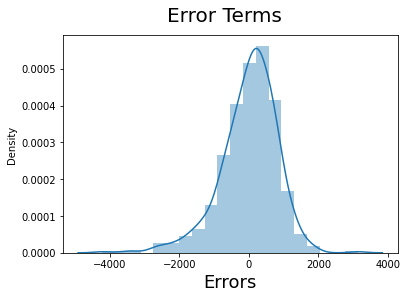

In [81]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

<b>Observation:</b><br> From above distribution plot it is clear that the error terms are normally distributed with 0 mean which is crucial for inferencing  Linear Regression model. 

# Linearity Check

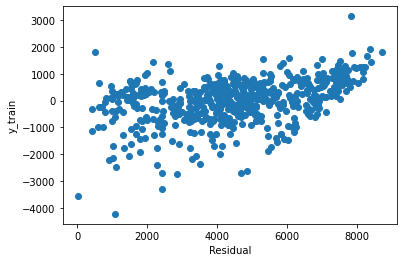

In [96]:
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

<b>observation</b><br> Fom above residual scatter plot,we can see that there is no clear pattern or clustering or continous pattern which makes the variables are not dependant on each other.

# Homoscedacity

In [115]:
#create instance of influence
influence = lr4.get_influence()

#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal

#Obtain Standardized predicted values
y_pred_standard = sklearn.preprocessing.scale(y_train_pred)

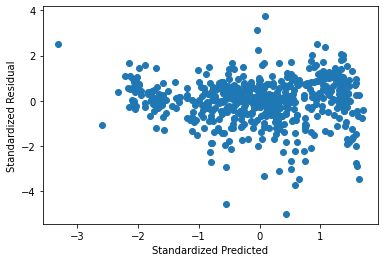

In [117]:
plt.scatter(y_pred_standard,standardized_residuals)
plt.ylabel("Standardized Residual")
plt.xlabel("Standardized Predicted")
plt.show()

In [ ]:
<b>observation</b><br> Fom above scatterplots there is no proper pattern which

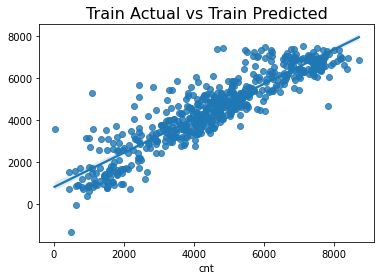

In [83]:
# Plot Train Actual vs Train Predicted
plt.title("Train Actual vs Train Predicted",fontsize=16)
sns.regplot(x=y_train,y=y_train_pred)
plt.show()

# Predictions on test data

In [84]:
# Scalling features of test data
num_vars=['temp','atemp','hum','windspeed']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [85]:
#Test data preparation
y_test = df_test.pop('cnt')
X_test = df_test

In [86]:
# Drop unnecessary features based on train data
X_test_df=X_test[X_train_rfe.columns.to_list()]

In [87]:
# Predict on test_data
X_test = sm.add_constant(X_test_df)
y_pred_test = lr5.predict(X_test)

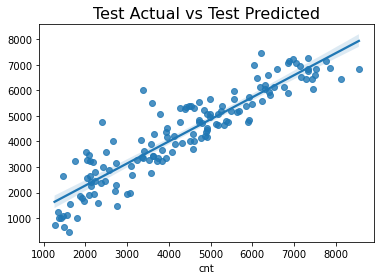

In [88]:
#Plot Test Actual vs Test Predicted
plt.title("Test Actual vs Test Predicted",fontsize=16)
sns.regplot(x=y_test,y=y_pred_test)
plt.show()

# Evaluation of Model on Test Data

In [94]:
# Find out the R squared value between test and predicted test data sets.  
r2=r2_score(y_test,y_pred_test)
r2

0.8379116632478885

<b>Obeservation:</b><br> R2-Score on the test data is good and model performed  well on test data.

We can see that the equation of our best fitted line is:
    cnt=2678.19 + 2016.9818 * year + 3089.1328 * temp  - 961.7583 * windspeed + 538.5091 * mnth_Mar + 725.3190 * mnth_Oct + 632 * mnth_Sep -1436 * season_spring - 2506 * weathersit_Light Rain -641 * weathersit_Mist 